In [27]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [28]:
df = pd.read_csv('../input/CO2_emission.csv')

In [29]:
df.head().T

,0,1,2,3,4
Model_Year,2021,2021,2021,2021,2021
Make,Acura,Acura,Acura,Acura,Acura
Model,ILX,NSX,RDX SH-AWD,RDX SH-AWD A-SPEC,TLX SH-AWD
Vehicle_Class,Compact,Two-seater,SUV: Small,SUV: Small,Compact
Engine_Size,2.4,3.5,2.0,2.0,2.0
Cylinders,4,6,4,4,4
Transmission,AM8,AM9,AS10,AS10,AS10
Fuel_Consumption_in_City(L/100 km),9.9,11.1,11.0,11.3,11.2
Fuel_Consumption_in_City_Hwy(L/100 km),7.0,10.8,8.6,9.1,8.0
Fuel_Consumption_comb(L/100km),8.6,11.0,9.9,10.3,9.8


In [30]:
df.columns

Index(['Model_Year', 'Make', 'Model', 'Vehicle_Class', 'Engine_Size',
       'Cylinders', 'Transmission', 'Fuel_Consumption_in_City(L/100 km)',
       'Fuel_Consumption_in_City_Hwy(L/100 km)',
       'Fuel_Consumption_comb(L/100km)', 'CO2_Emissions', 'Smog_Level'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 935 entries, 0 to 934
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Model_Year                              935 non-null    int64  
 1   Make                                    935 non-null    object 
 2   Model                                   935 non-null    object 
 3   Vehicle_Class                           935 non-null    object 
 4   Engine_Size                             935 non-null    float64
 5   Cylinders                               935 non-null    int64  
 6   Transmission                            935 non-null    object 
 7   Fuel_Consumption_in_City(L/100 km)      935 non-null    float64
 8   Fuel_Consumption_in_City_Hwy(L/100 km)  935 non-null    float64
 9   Fuel_Consumption_comb(L/100km)          935 non-null    float64
 10  CO2_Emissions                           935 non-null    int64 

In [32]:
df.isnull().sum()

Model_Year                                0
Make                                      0
Model                                     0
Vehicle_Class                             0
Engine_Size                               0
Cylinders                                 0
Transmission                              0
Fuel_Consumption_in_City(L/100 km)        0
Fuel_Consumption_in_City_Hwy(L/100 km)    0
Fuel_Consumption_comb(L/100km)            0
CO2_Emissions                             0
Smog_Level                                0
dtype: int64

In [33]:
# Encode and map categorical features
feature_mappings = {}
df_transform = df.copy()
for col in df_transform.columns:

    # check column data type if it is an object
    if df_transform[col].dtype =='object': 
        # fill NaN values in column
        df_transform[col] = df_transform[col].fillna('N')

        # initialize LabelEncoder
        lbl = LabelEncoder()

        # fit label encoder
        lbl.fit(list(df_transform[col].values))

        # transform values on column
        df_transform[col] = lbl.transform(df_transform[col].values)
        feature_mappings[col] = {l: i for i, l in enumerate(lbl.classes_)}

# Exploring Categorical Features

In [34]:
cat_features = list(feature_mappings.keys())
cat_features

['Make', 'Model', 'Vehicle_Class', 'Transmission']

In [35]:
# display mapped features
print(json.dumps(feature_mappings[cat_features[2]], indent=4))

{
    "Compact": 0,
    "Full-size": 1,
    "Mid-size": 2,
    "Minicompact": 3,
    "Minivan": 4,
    "Pickup truck: Small": 5,
    "Pickup truck: Standard": 6,
    "SUV: Small": 7,
    "SUV: Standard": 8,
    "Special purpose vehicle": 9,
    "Station wagon: Mid-size": 10,
    "Station wagon: Small": 11,
    "Subcompact": 12,
    "Two-seater": 13,
    "Van: Passenger": 14
}


In [36]:
for t in cat_features:
    print(f'Vehicle {t} types: ', len(df_transform[t].value_counts()))
 

Vehicle Make types:  38
Vehicle Model types:  703
Vehicle Vehicle_Class types:  15
Vehicle Transmission types:  23


In [37]:
print(df['Transmission'].unique())

['AM8' 'AM9' 'AS10' 'A8' 'A9' 'M7' 'AM7' 'AS8' 'M6' 'AS6' 'AV' 'AS9' 'A10'
 'A6' 'M5' 'AV7' 'AV1' 'AM6' 'AS7' 'AV8' 'AV6' 'AV10' 'AS5']


In [38]:
def plot_cat_count(df, col, cutoff, ascending=False):
    Max_vehicle = df[col].value_counts().sort_values(ascending=ascending)[0:cutoff]
    Max_vehicle.name = 'Count'
    Max_vehicle.index.name = col

    fig = plt.figure(figsize=(14,8))
    sns.barplot(x=Max_vehicle.index, y= Max_vehicle)
    plt.title(f'Count of {col} types')
    plt.xticks(rotation=90)
    plt.tight_layout()

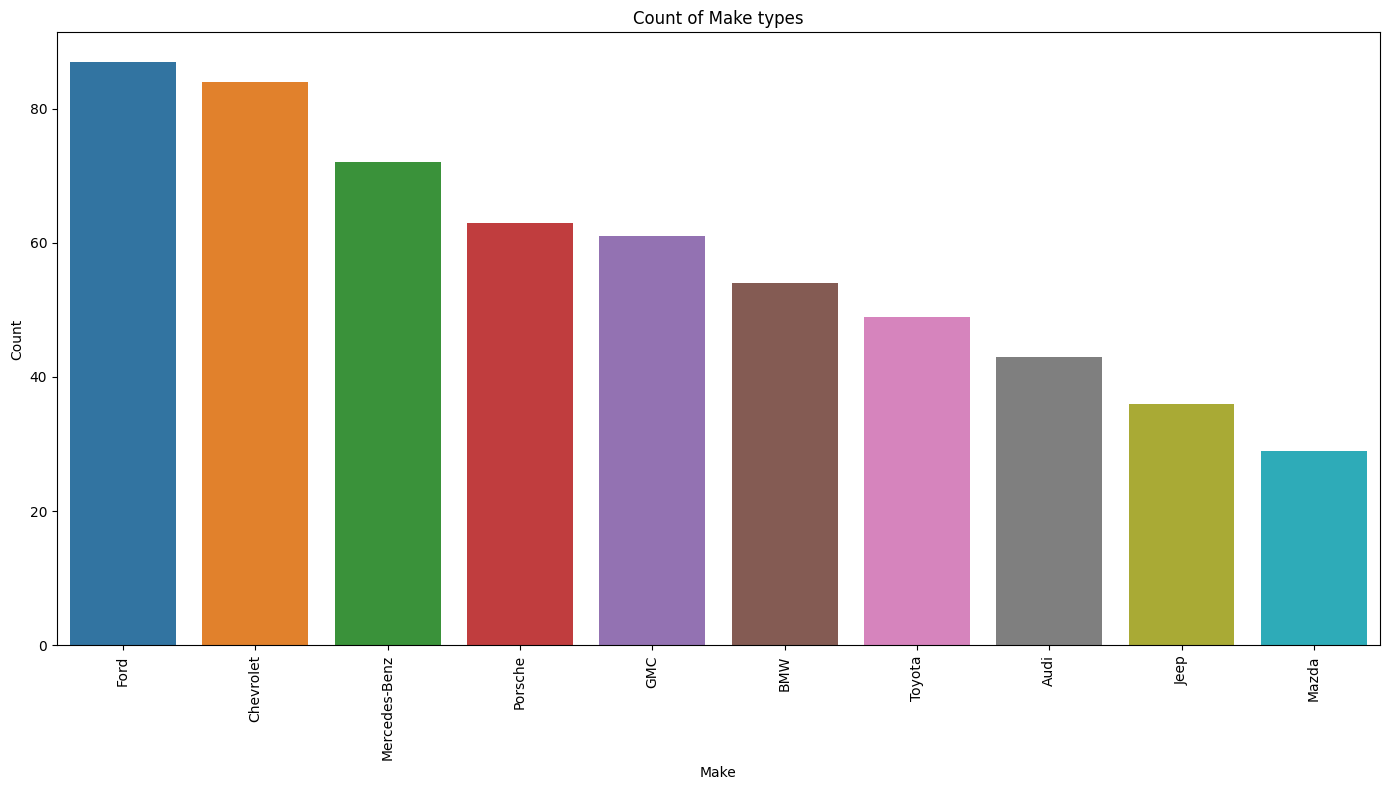

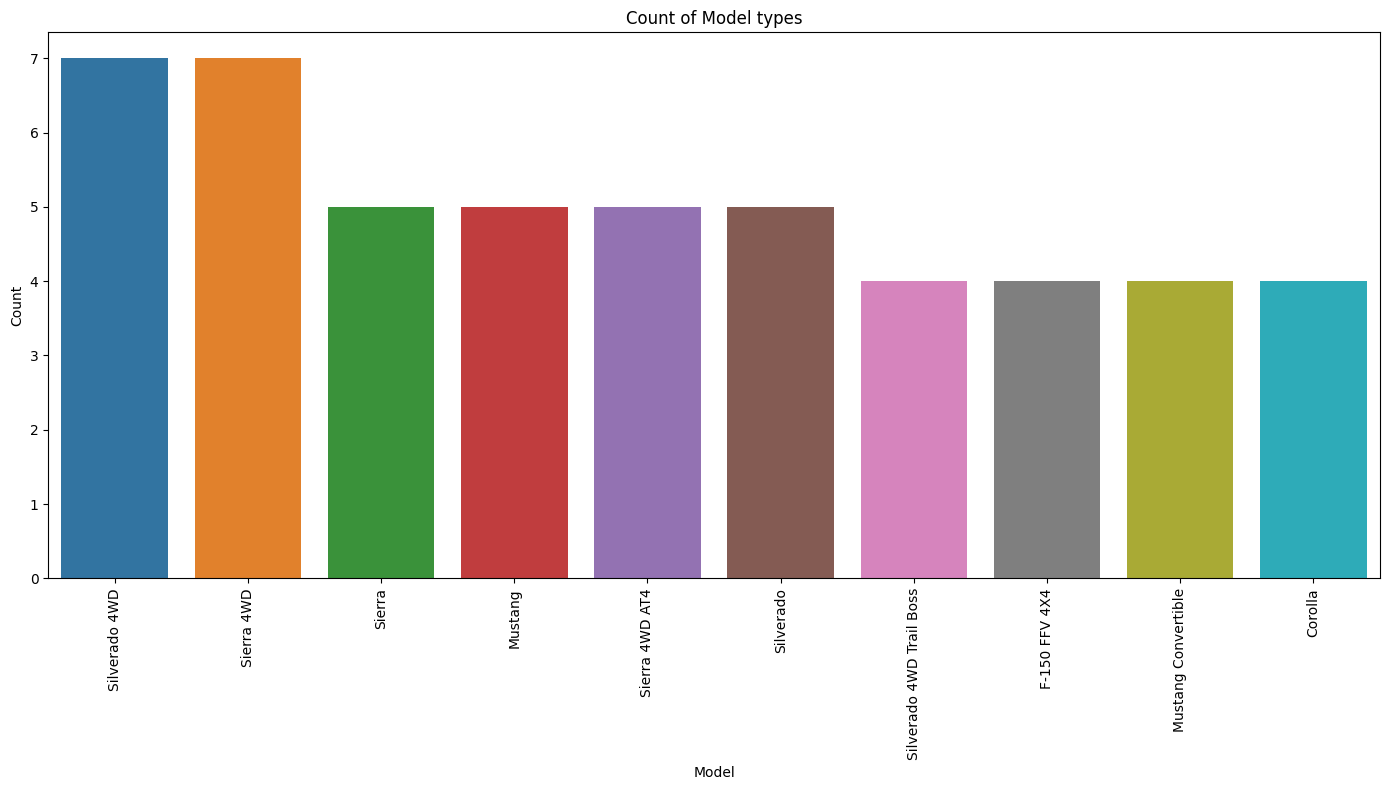

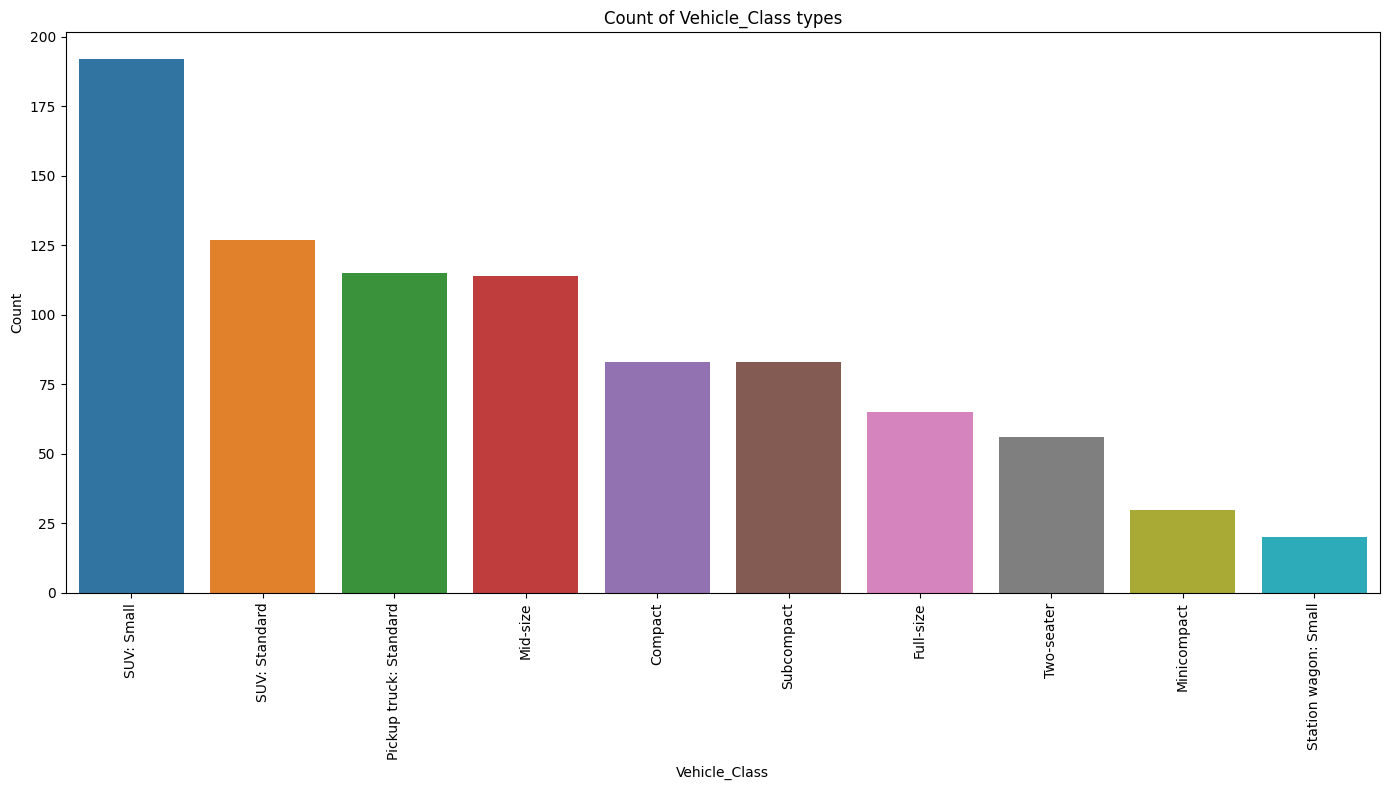

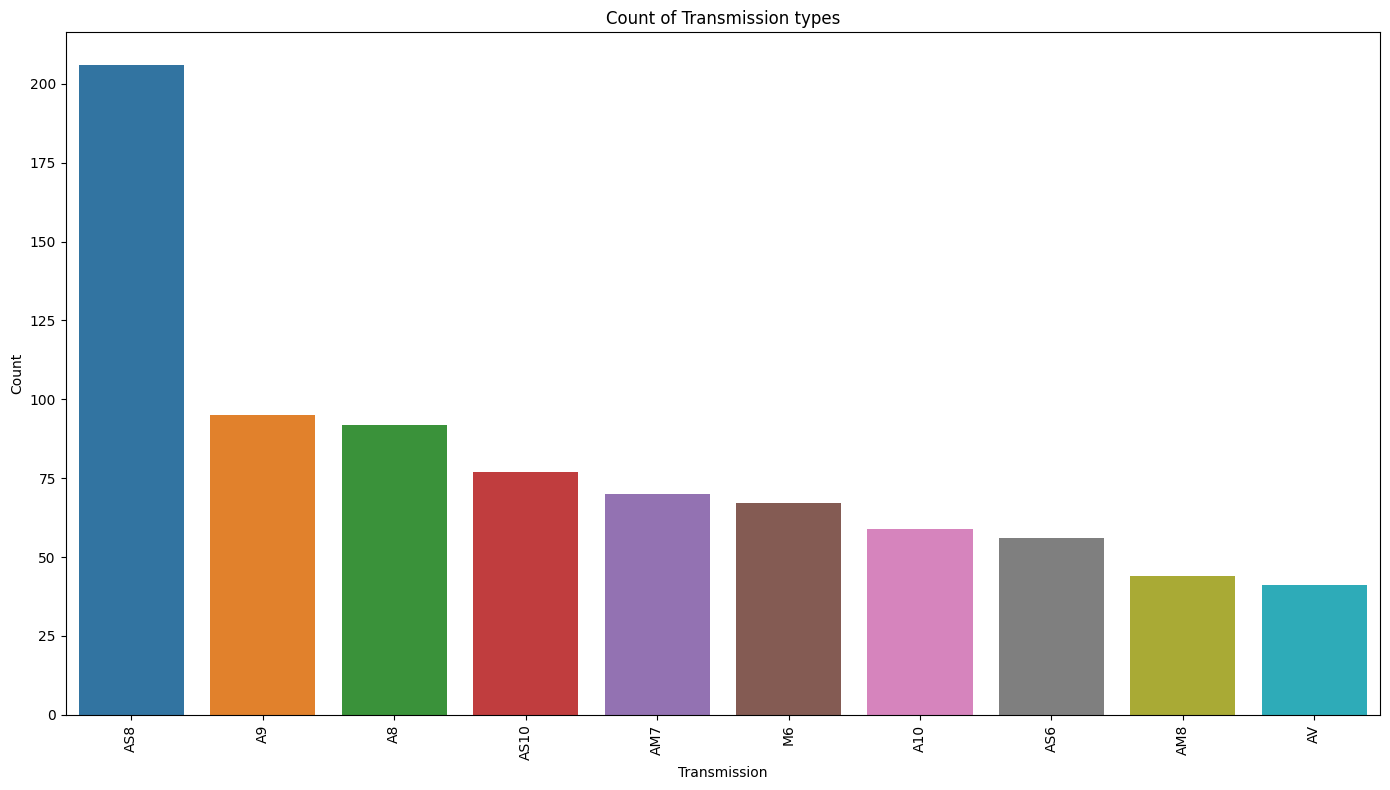

In [39]:
num_of_items = 10
for col in cat_features:
    if num_of_items > len(df[col].unique()):
        num_of_items = len(df[col].unique())
    plot_cat_count(df, col, num_of_items)

In [40]:
col = cat_features[2] 
df[col].value_counts()

SUV: Small                 192
SUV: Standard              127
Pickup truck: Standard     115
Mid-size                   114
Compact                     83
Subcompact                  83
Full-size                   65
Two-seater                  56
Minicompact                 30
Station wagon: Small        20
Pickup truck: Small         17
Special purpose vehicle     13
Station wagon: Mid-size      9
Minivan                      7
Van: Passenger               4
Name: Vehicle_Class, dtype: int64

In [41]:
def boxplot_unique_cat(df, col, cutoff):
    if cutoff > len(df[col].unique()):
        cutoff = len(df[col].unique())
    data = df[col].sort_values().unique()[0:cutoff] 
    fig, ax = plt.subplots(1,2,figsize = (15,10))
    sns.boxplot(x = col, y = 'CO2_Emissions', data=df[df[col].isin(data)], ax=ax[0])
    ax[0].set_title(f'Box Plot of {col} vs CO2_Emissions')
    plt.xticks(rotation=90)
    plt.tight_layout()

    sns.violinplot(x = col, y = 'CO2_Emissions', data=df[df[col].isin(data)], ax=ax[1])
    ax[1].set_title(f'Violin plot of {col} vs CO2_Emissions')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()
    

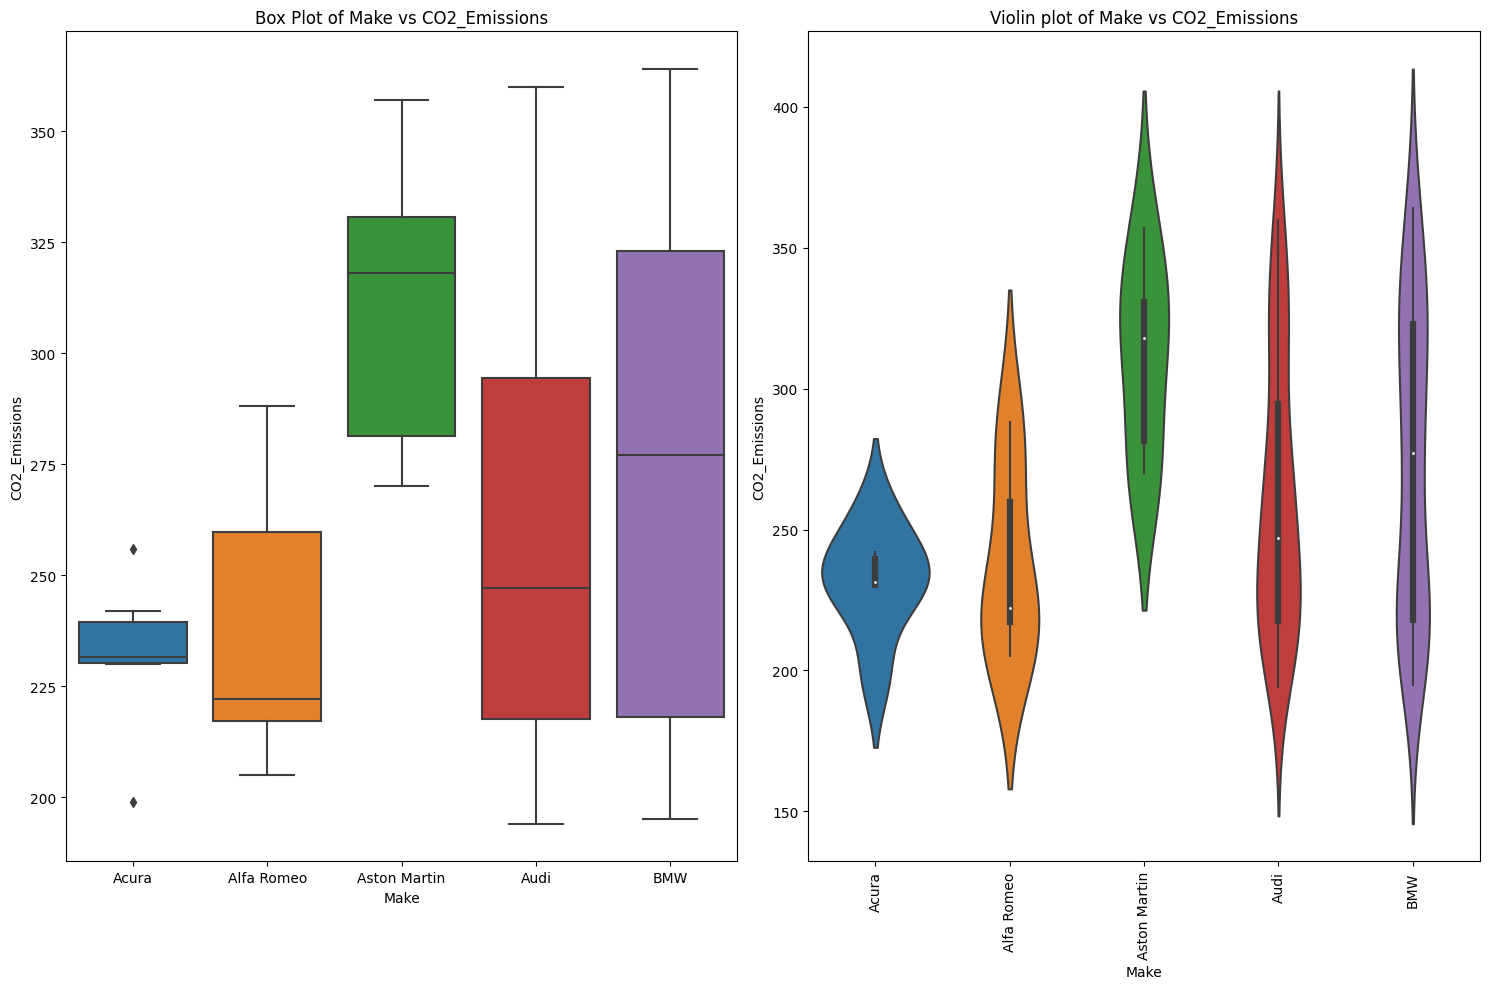

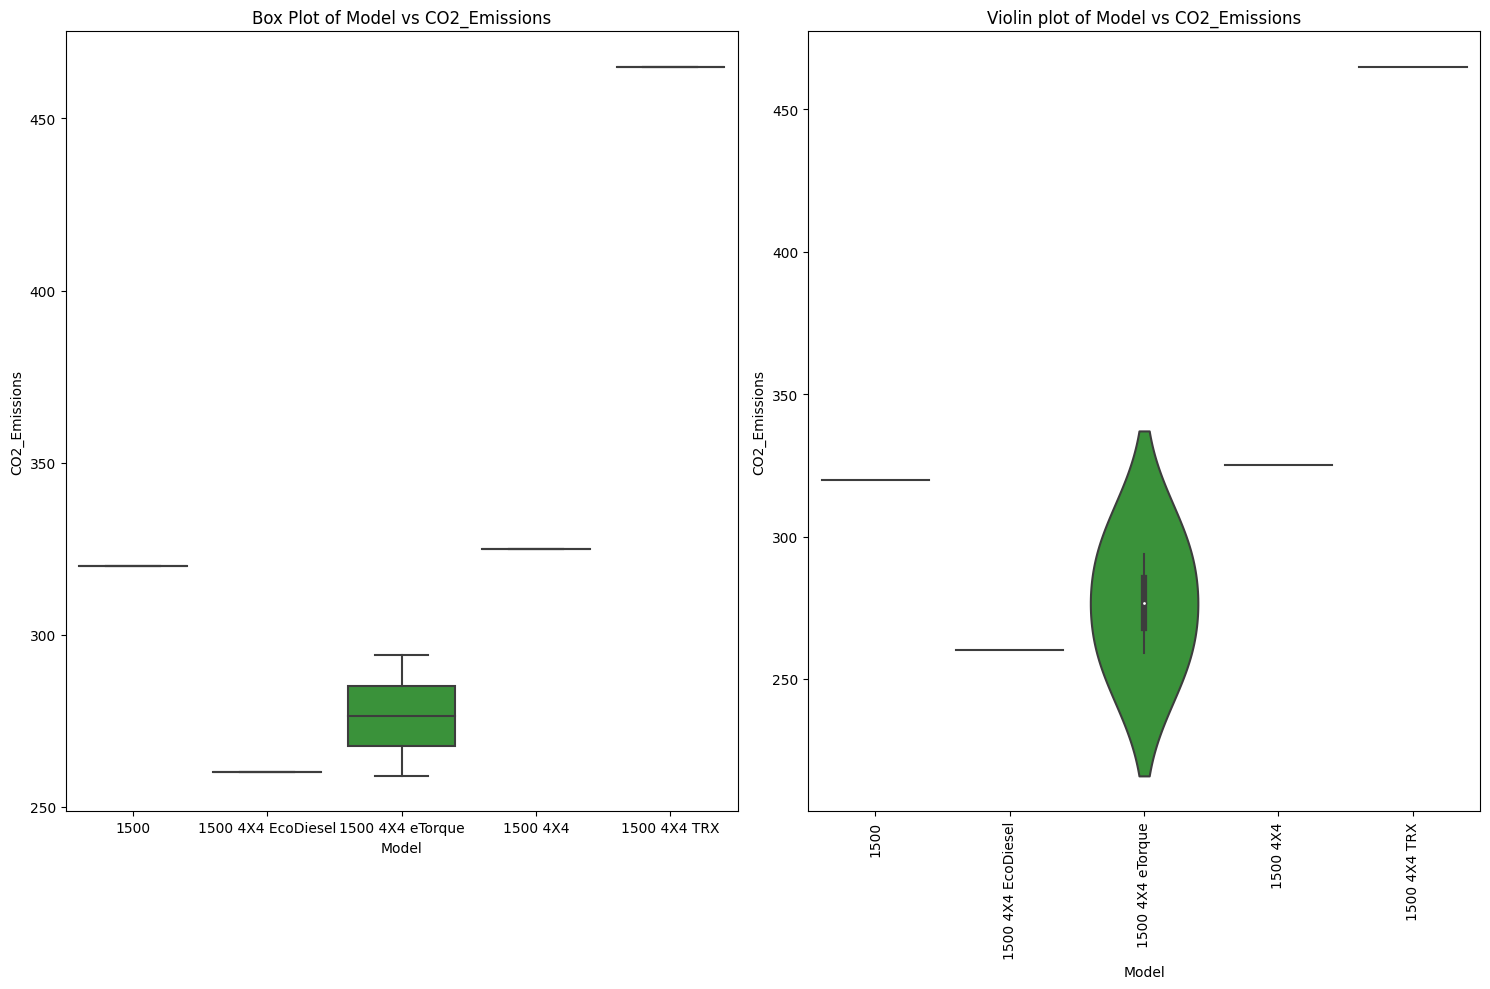

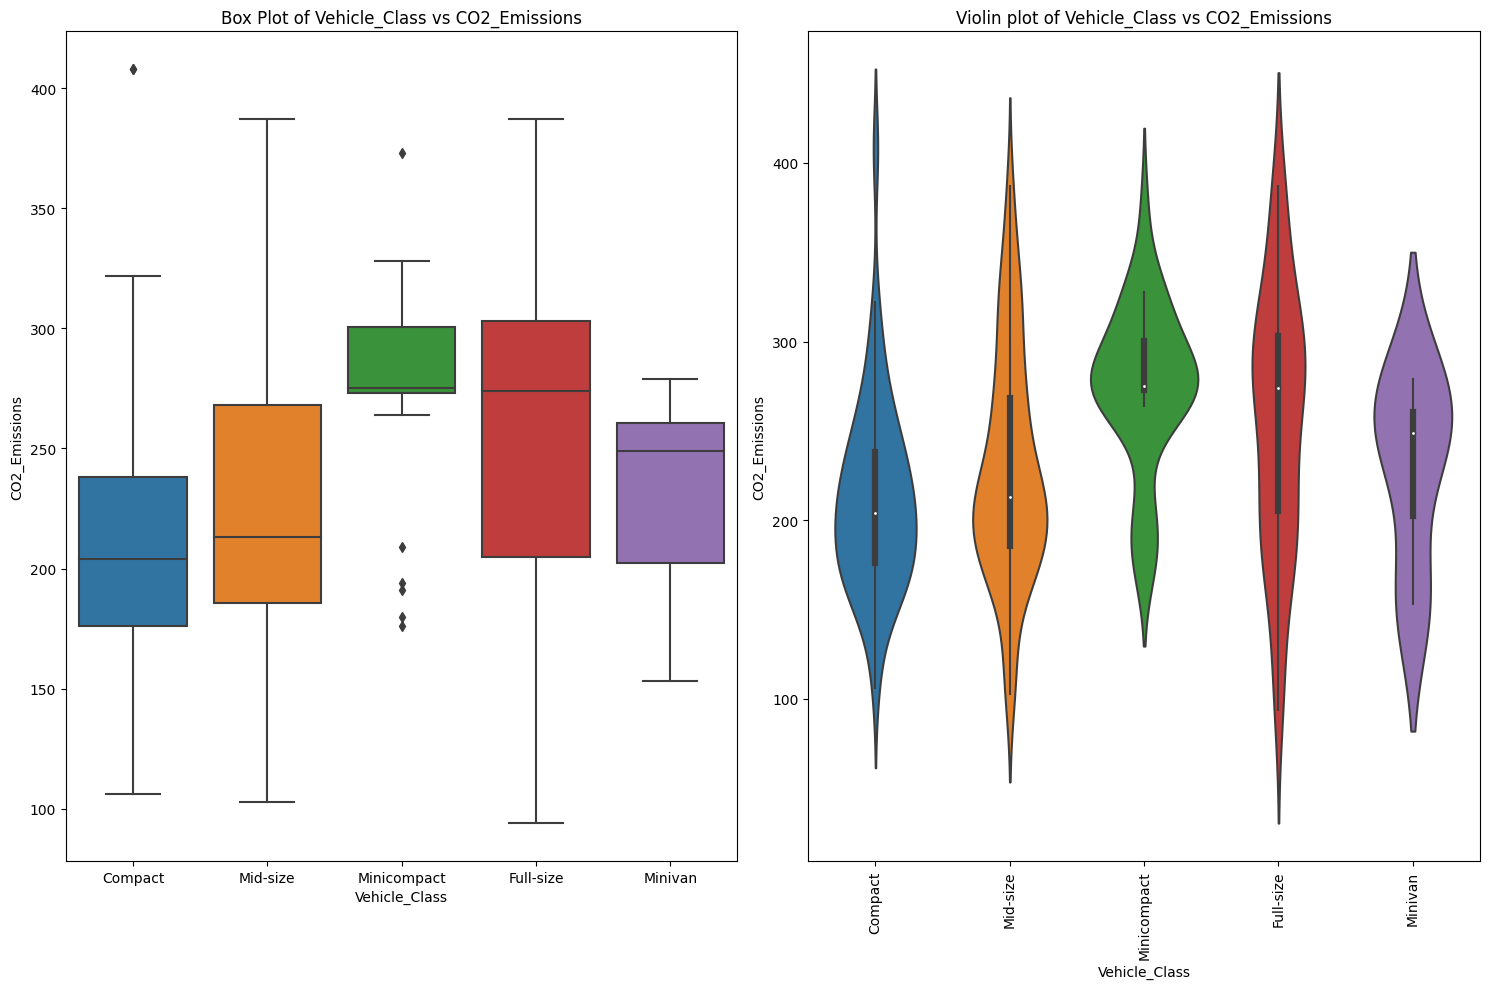

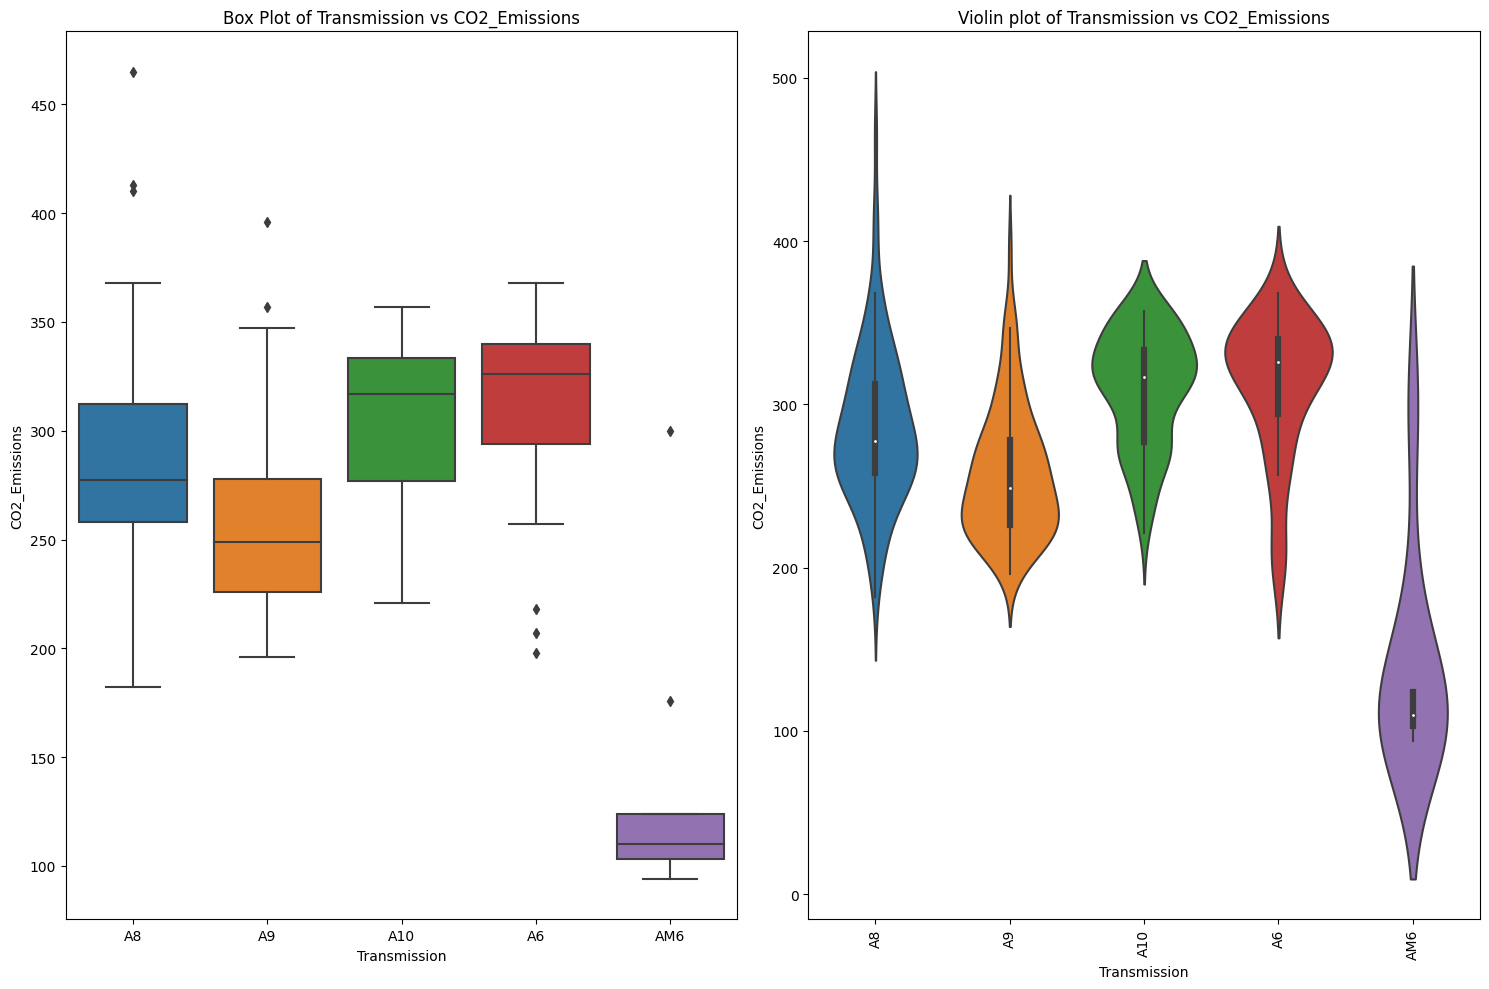

In [42]:
cutoff = 5
for col in cat_features:
    boxplot_unique_cat(df, col, cutoff=cutoff)

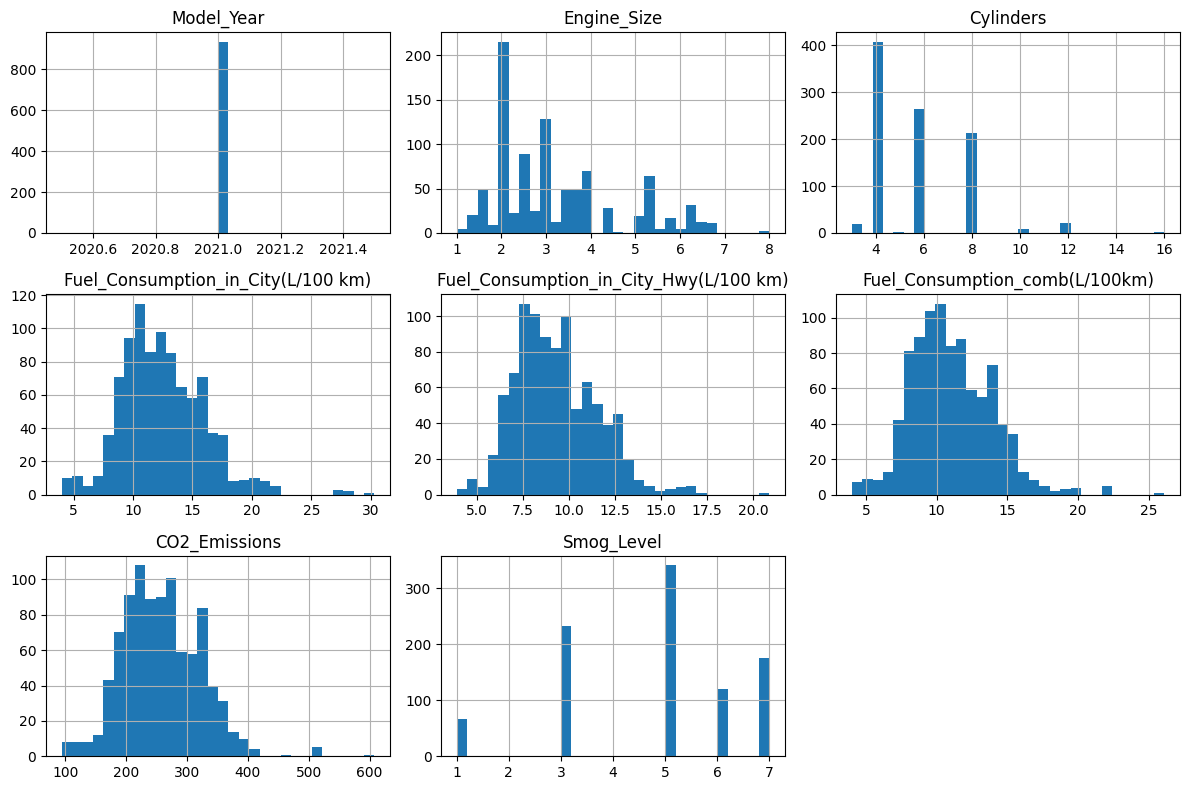

In [43]:
df.hist(figsize=(12,8),bins=30)
plt.tight_layout()
plt.show()

In [44]:
def bivariate_analysis(data, x):
    plt.figure(figsize=(10,6))
    ax = sns.regplot(x=x, y='CO2_Emissions',data=data)
    ax.set_title("CO2_Emissions vs "+ x, fontsize=25)
    ax.set_xlabel(x, fontsize=20)
    ax.set_ylabel('CO2_Emissions', fontsize=20)
    plt.locator_params(axis='x', nbins=10)

# Exploring Numerical Features

In [45]:
num_features = []
for col in df.columns:
    # check column data type if it is an object
    if df[col].dtype != 'object': 
        # append column name
        num_features.append(col)

num_features.remove('CO2_Emissions')

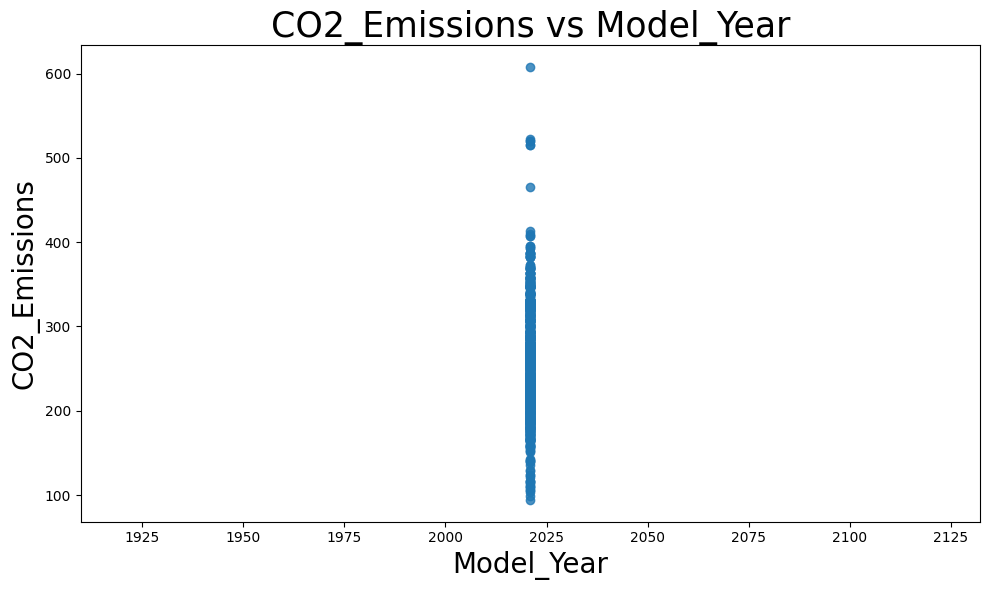

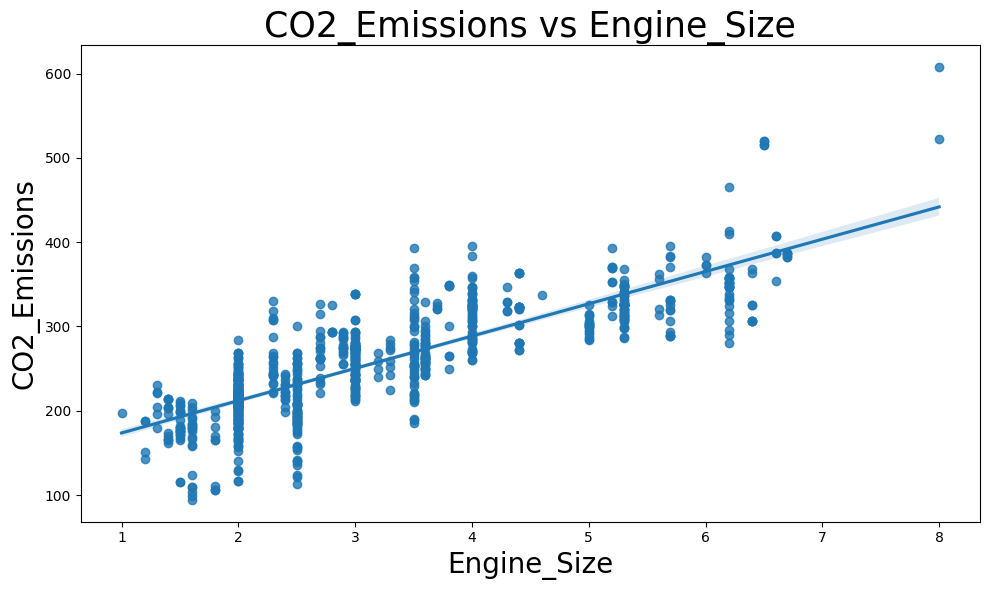

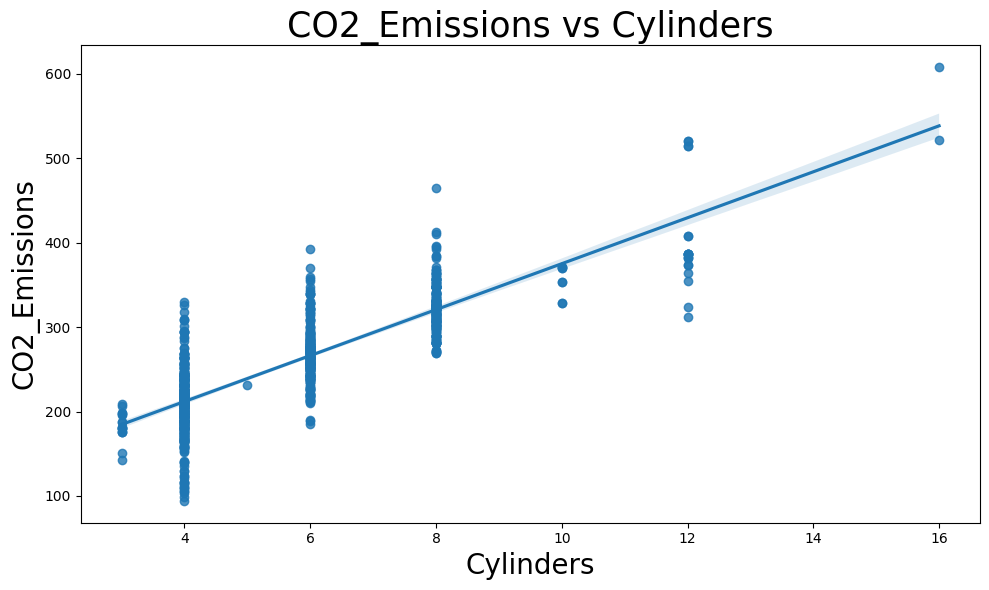

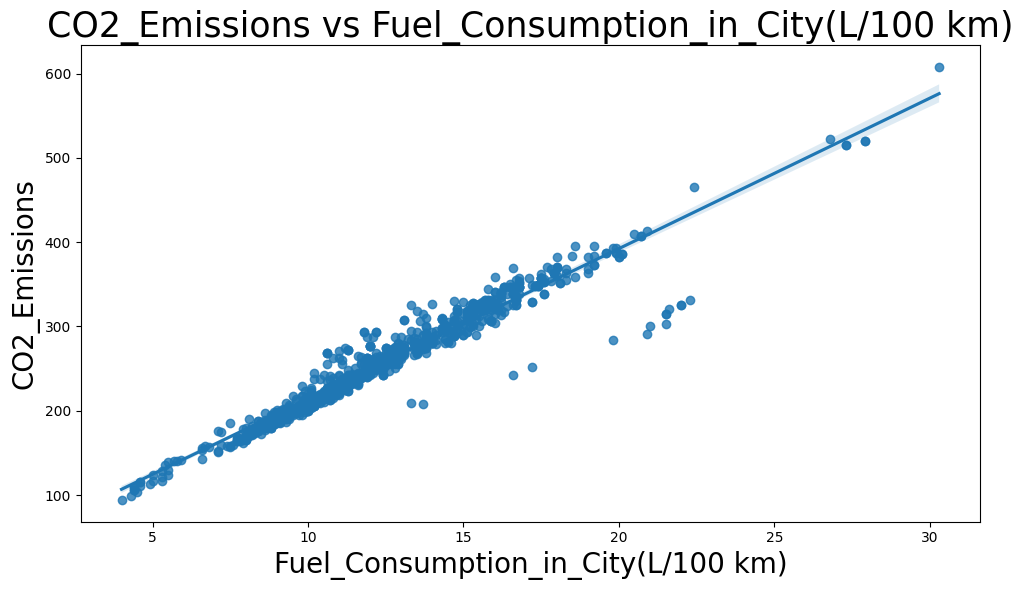

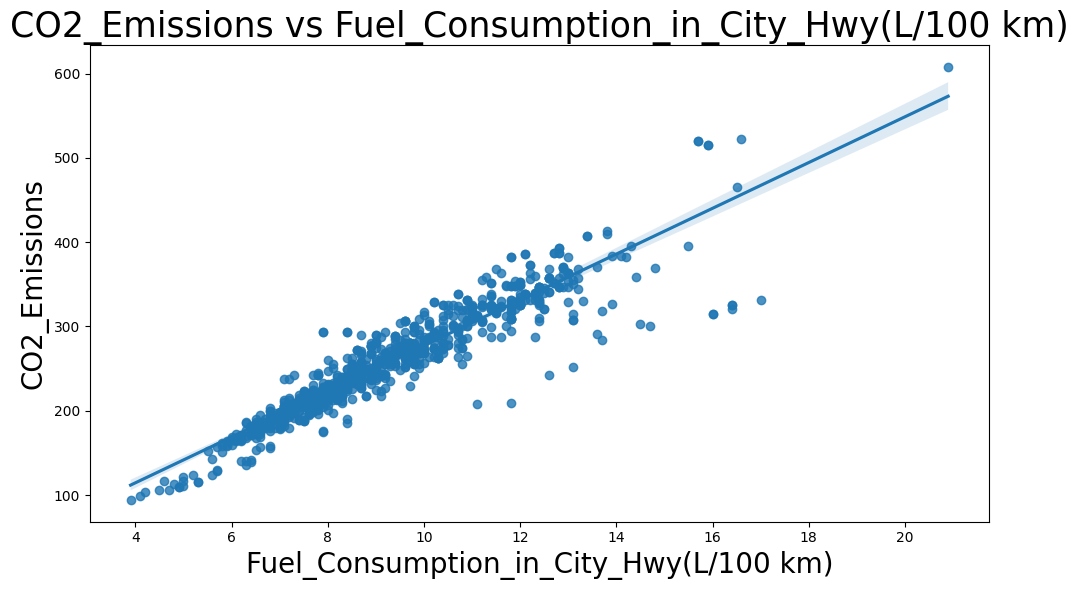

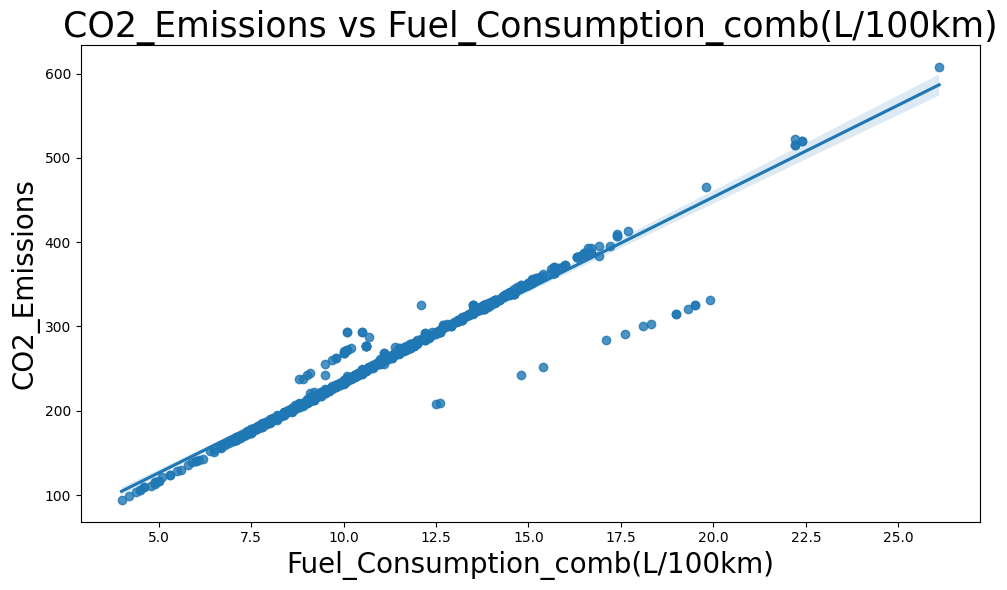

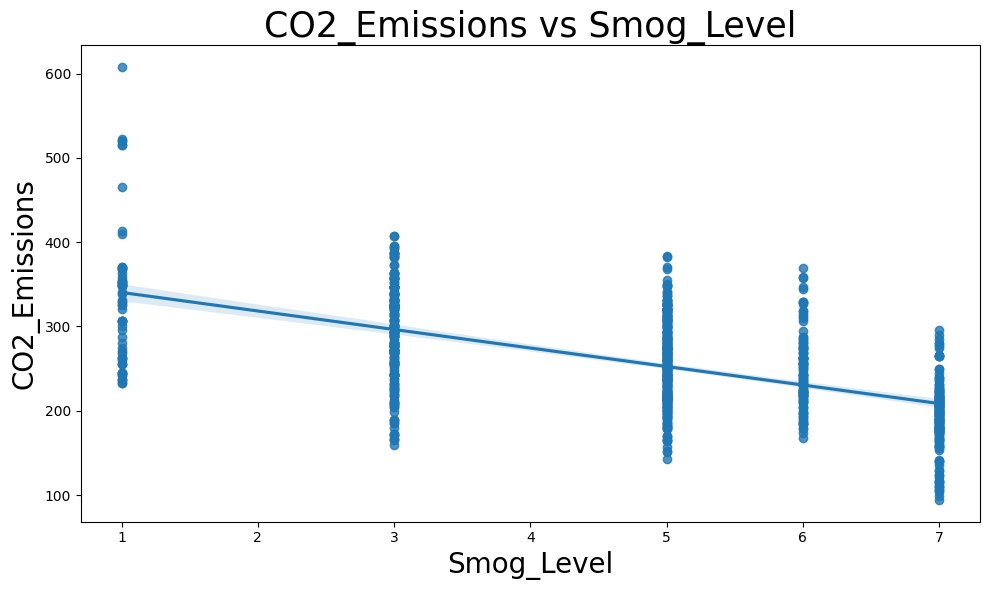

In [46]:
for x in num_features:
    bivariate_analysis(df, x)
    plt.tight_layout()

In [47]:
num_features.remove('Model_Year')

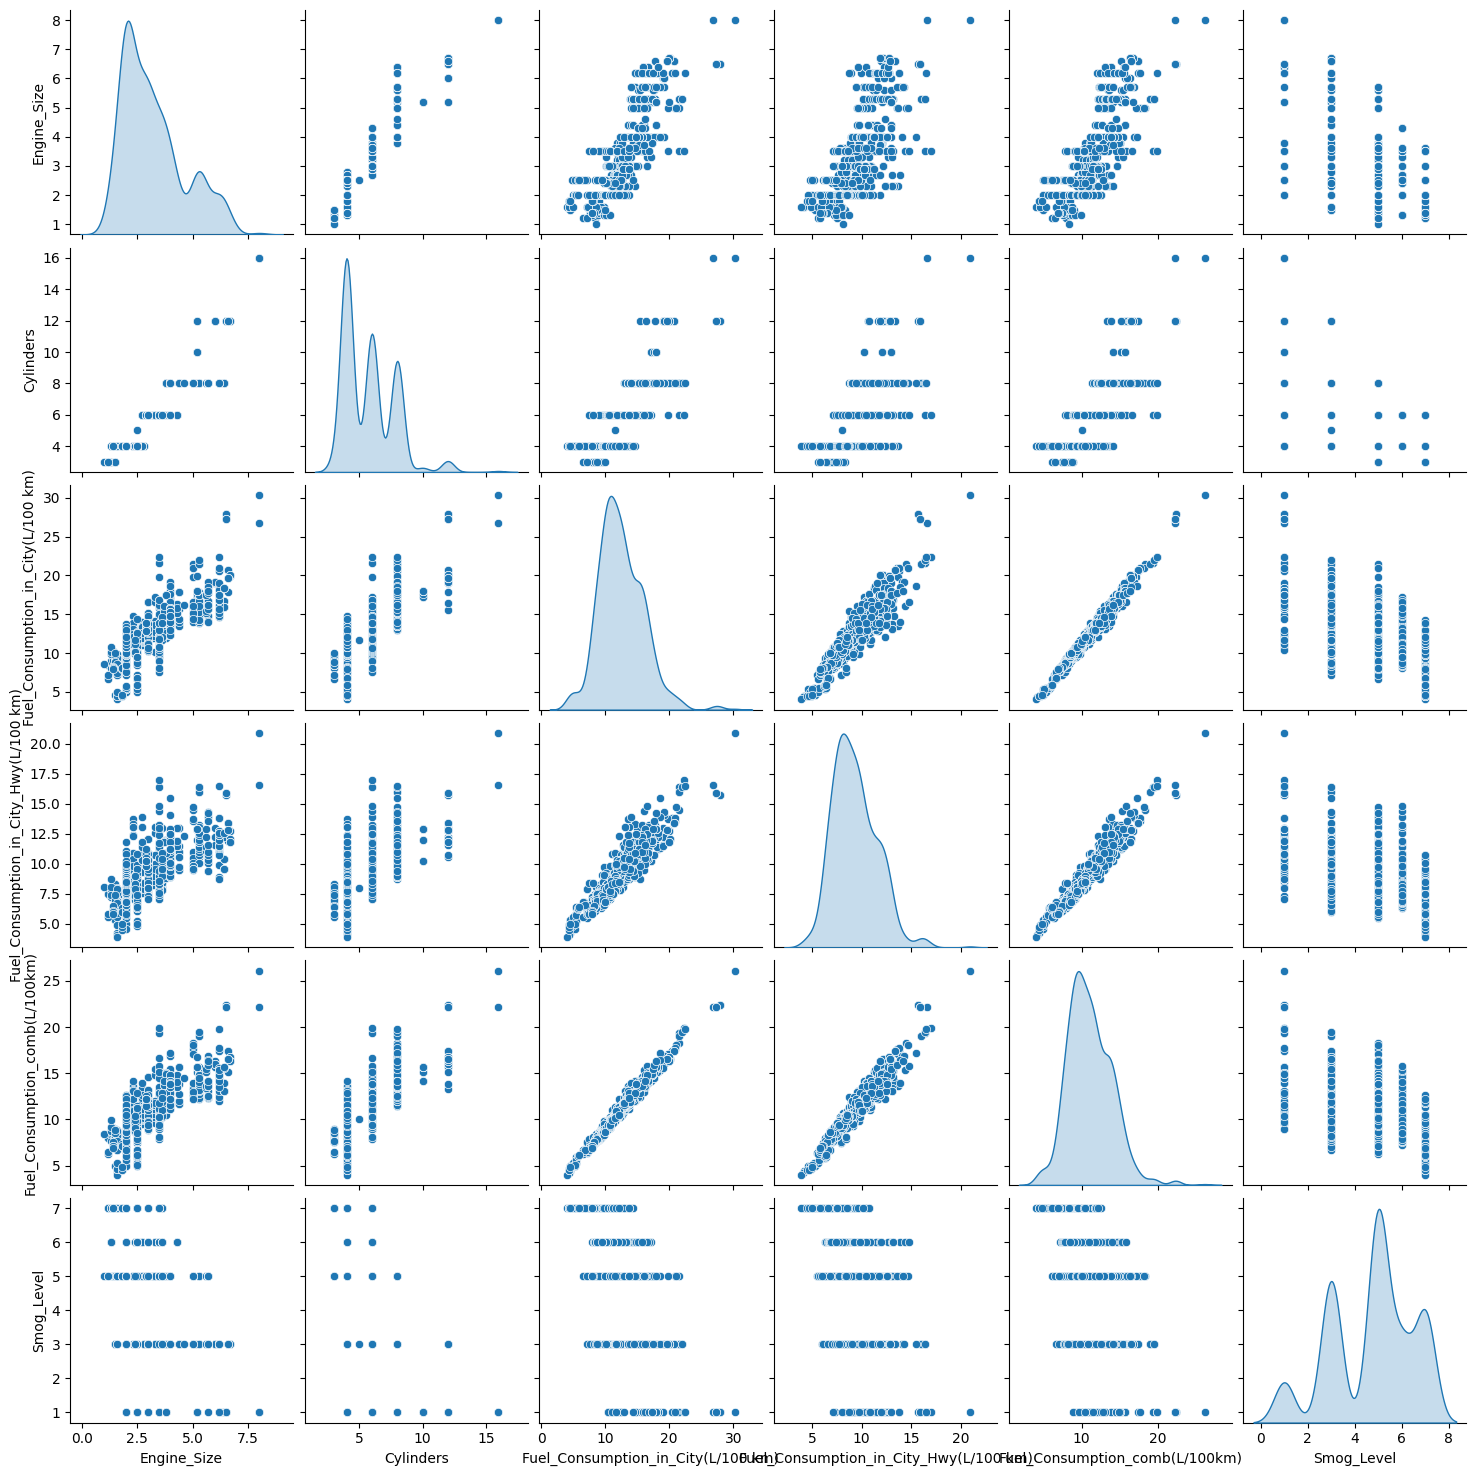

In [48]:
sns.pairplot(df_transform[num_features], diag_kind='kde')

<AxesSubplot: >

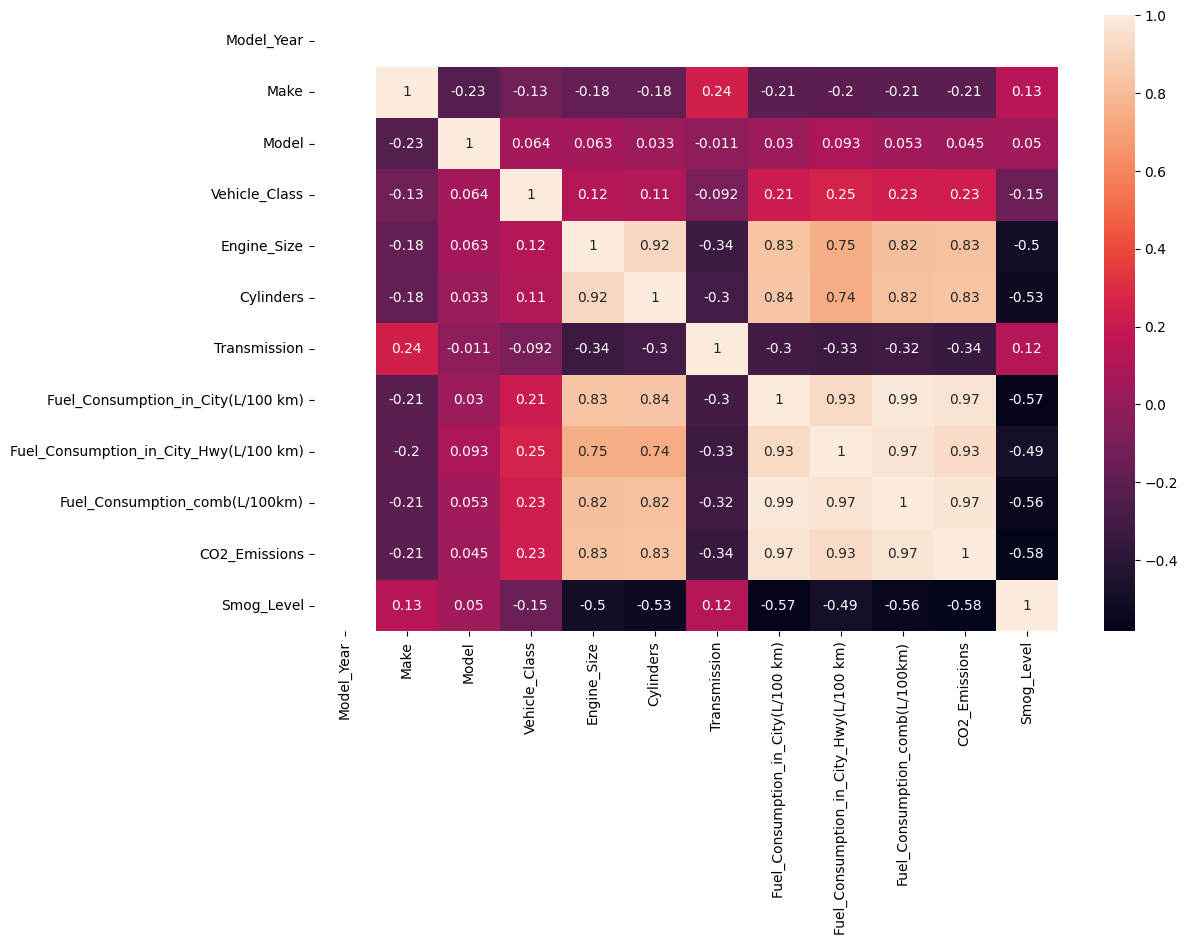

In [49]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df_transform.corr(),annot=True)

In [50]:
# shuffle the dataframe
split_ratio = len(df_transform)//4
df_shuffled = df_transform.sample(frac=1, random_state=1).reset_index(drop=True)
co2_train = df_shuffled.iloc[:split_ratio,]
co2_test = df_shuffled.iloc[split_ratio:,]

In [51]:
co2_train.to_csv('../input/CO2_emission_train.csv')
co2_test.to_csv('../input/CO2_emission_test.csv')